
Davies-Bouldin Index: 0.72127971818163


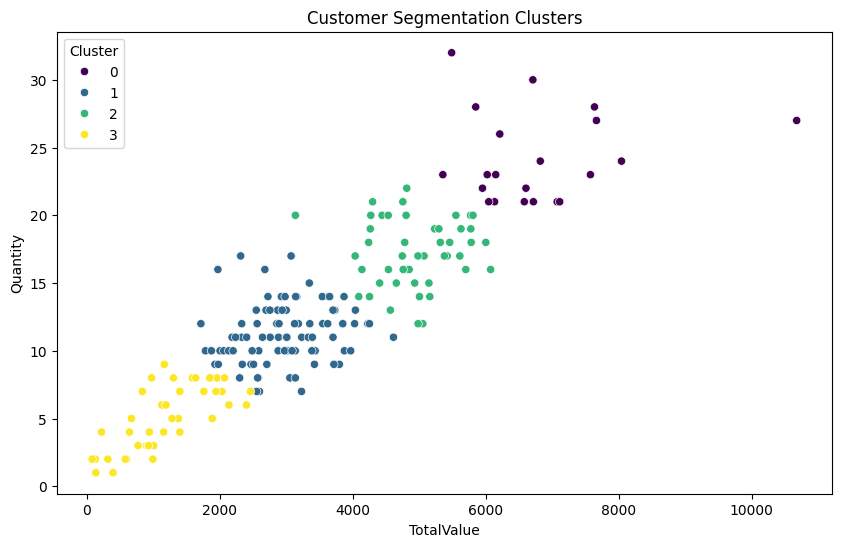

In [13]:
# TASK 3: Customer Segmentation/Clustering
def customer_segmentation(customers, transactions):
    # Merge customer and transaction data
    merged = pd.merge(transactions, customers, on="CustomerID", how="inner")

    # Aggregate transactional data for each customer
    customer_data = (
        merged.groupby("CustomerID")
        .agg({"TotalValue": "sum", "Quantity": "sum"})
        .reset_index()
    )
    customer_data = pd.merge(customers, customer_data, on="CustomerID", how="inner")

    # Prepare data for clustering
    clustering_features = customer_data[["TotalValue", "Quantity"]]
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(clustering_features)

    # Apply KMeans Clustering
    kmeans = KMeans(n_clusters=4, random_state=42)
    clusters = kmeans.fit_predict(scaled_features)
    customer_data["Cluster"] = clusters

    # Calculate Davies-Bouldin Index
    db_index = davies_bouldin_score(scaled_features, clusters)
    print("\nDavies-Bouldin Index:", db_index)

    # Visualize clusters
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        x="TotalValue",
        y="Quantity",
        hue="Cluster",
        data=customer_data,
        palette="viridis",
    )
    plt.title("Customer Segmentation Clusters")
    plt.show()

customer_segmentation(customers, transactions)